SHAP input shape: (2156, 7)
SHAP Summary Plot: Random Forest Regressor


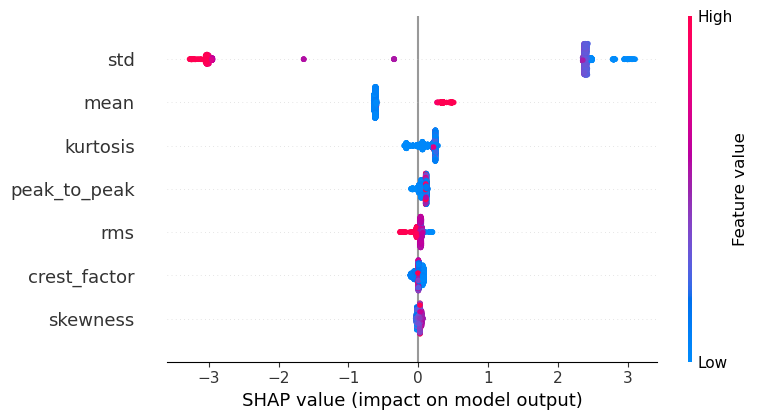

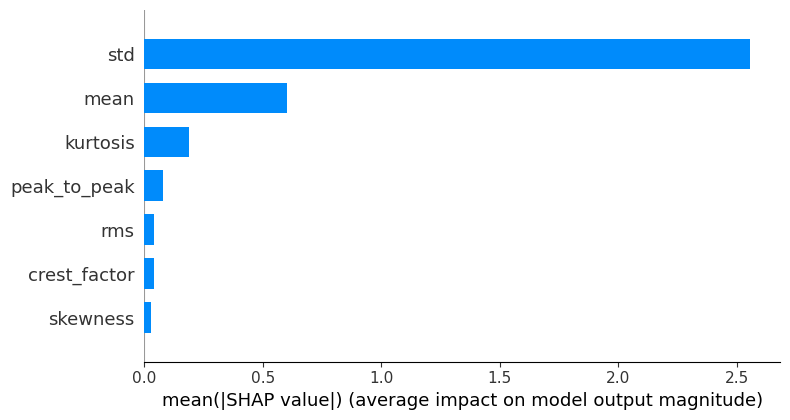

SHAP Summary Plot: XGBoost Regressor


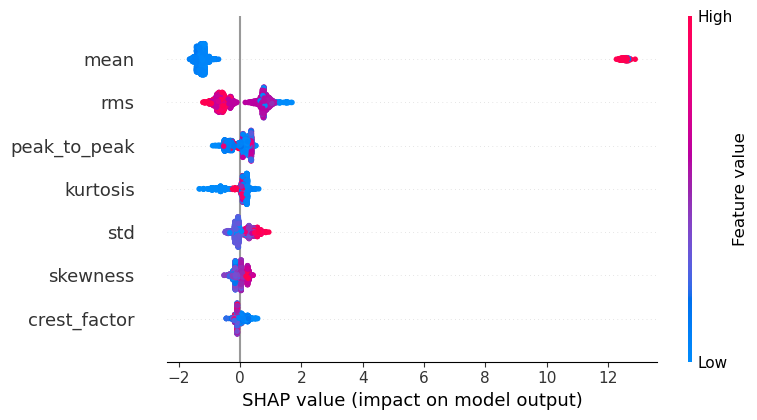

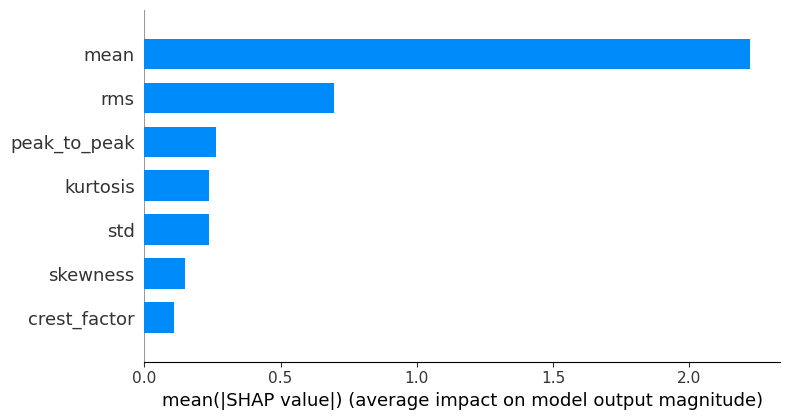

In [1]:
# bearing_shap_rul.ipynb

import pandas as pd
import shap
import joblib
import matplotlib.pyplot as plt

# === Load Data ===
df = pd.read_csv("C:/Users/ammar/SHAP_ML/outputs/bearing_rul.csv")

# Drop non-feature columns (MUST match what models were trained on)
X = df.drop(columns=["RUL", "filename", "timestamp_index"])
print("SHAP input shape:", X.shape)

# === Load Models ===
rf = joblib.load("C:/Users/ammar/SHAP_ML/models/rf_rul_bearing.pkl")
xgb = joblib.load("C:/Users/ammar/SHAP_ML/models/xgb_rul_bearing.pkl")

# === SHAP: Random Forest Regressor ===
print("SHAP Summary Plot: Random Forest Regressor")
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X, check_additivity=False)

# Summary Plot
shap.summary_plot(shap_values_rf, X, show=True)
shap.summary_plot(shap_values_rf, X, plot_type="bar", show=True)

# === SHAP: XGBoost Regressor ===
print("SHAP Summary Plot: XGBoost Regressor")
explainer_xgb = shap.Explainer(xgb, X)
shap_values_xgb = explainer_xgb(X, check_additivity=False)

# Summary Plot
shap.summary_plot(shap_values_xgb.values, X, show=True)
shap.summary_plot(shap_values_xgb.values, X, plot_type="bar", show=True)

# Save SHAP values
pd.DataFrame(shap_values_rf, columns=X.columns).to_csv("C:/Users/ammar/SHAP_ML/outputs/shap_rf_rul.csv", index=False)
pd.DataFrame(shap_values_xgb.values, columns=X.columns).to_csv("C:/Users/ammar/SHAP_ML/outputs/shap_xgb_rul.csv", index=False)